In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
import seaborn as sns

In [67]:
df = pd.read_csv("combined_dataset.csv")

In [68]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Type'])
print(label_encoder.classes_)

['harmful' 'safe']


In [69]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Content']], y, test_size=0.3, random_state=42)

# Initialize and fit TF-IDF vectorizer on training data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train['Content'])
X_test_transformed = vectorizer.transform(X_test['Content']) 

In [70]:
# Create a svm classfier
clf = svm.SVC(kernel='linear')

# Train the model using training set
clf.fit(X_train_transformed, y_train)

# Predict the response of dataset
y_pred = clf.predict(X_test_transformed)

In [71]:
# Predict the response on training data
y_train_pred = clf.predict(X_train_transformed)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9942857142857143
Test Accuracy: 0.9366666666666666


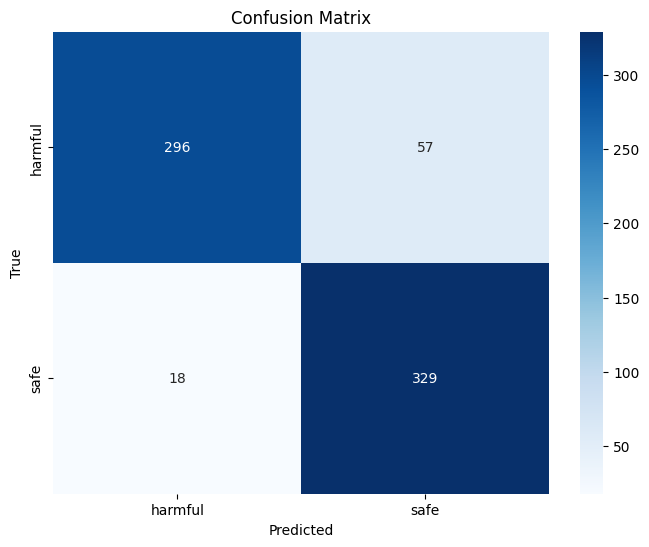

In [73]:

clf.fit(X_train_transformed, y_train)
predictions = cross_val_predict(clf, X_train_transformed, y_train, cv=5)

conf_matrix = confusion_matrix(y_train, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       147
           1       0.94      0.94      0.94       153

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

